In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data,  test_labels) = reuters.load_data(
    num_words=10000)

2023-07-30 00:00:27.230691: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2110848/2110848 [==============================] - 1s 1us/step


In [2]:
len(train_data)

8982

In [3]:
train_data[1]

[1,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

In [4]:
train_labels[1]

4

In [10]:
word_index = reuters.get_word_index() # ←---- word_index是一个将单词映射为整数索引的字典
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # ←----将字典的键和值交换，将整数索引映射为单词
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]) # ←----对评论解码。注意，索引减去了3，因为0、1、2分别是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）保留的索引

In [11]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # ←----创建一个形状为(len(sequences), dimension)的零矩阵
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # ←----将results[i]某些索引对应的值设为1
    return results
x_train = vectorize_sequences(train_data) # ←----将训练数据向量化
x_test = vectorize_sequences(test_data) # ←----将测试数据向量化

In [15]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [21]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [22]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 55ms/step - loss: 2.8408 - accuracy: 0.4955 - val_loss: 1.9044 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.6137 - accuracy: 0.6758 - val_loss: 1.4324 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.2409 - accuracy: 0.7360 - val_loss: 1.2279 - val_accuracy: 0.7280
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 1.0239 - accuracy: 0.7762 - val_loss: 1.1020 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8624 - accuracy: 0.8140 - val_loss: 1.0310 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.7272 - accuracy: 0.8418 - val_loss: 1.0105 - val_accuracy: 0.7690
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6096 - accuracy: 0.8713 - val_loss: 0.9448 - val_accuracy: 0.7910
Epoch 8/20
16

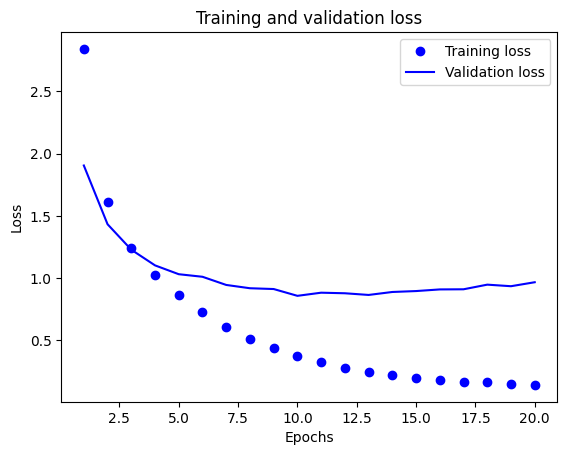

In [25]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

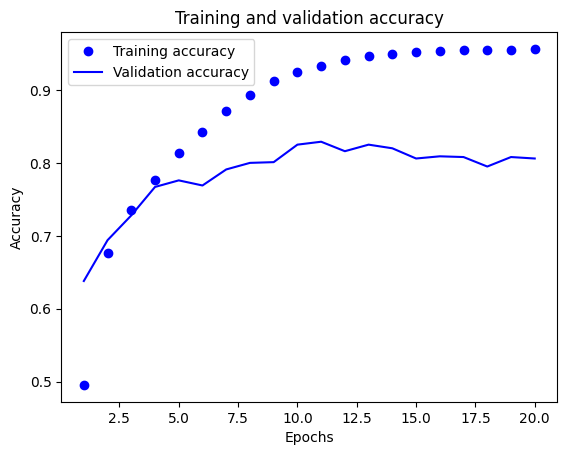

In [26]:
plt.clf() # ←----清空图像
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 2.6873 - accuracy: 0.4921
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.5171 - accuracy: 0.6656
Epoch 3/9
18/18 [==============================] - 0s 16ms/step - loss: 1.1585 - accuracy: 0.7497
Epoch 4/9
18/18 [==============================] - 0s 20ms/step - loss: 0.9371 - accuracy: 0.7977
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7700 - accuracy: 0.8319
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6408 - accuracy: 0.8597
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5298 - accuracy: 0.8888
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.4473 - accuracy: 0.9048
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9183 - accuracy: 0.7898


In [28]:
results

[0.918337345123291, 0.7898486256599426]

In [29]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [30]:
predictions[0]

array([8.6629016e-06, 3.5391757e-04, 3.5156845e-06, 8.8416725e-01,
       1.0776884e-01, 1.3296067e-04, 9.7633929e-05, 8.2746537e-06,
       2.0128514e-03, 3.1604639e-05, 4.3734773e-05, 1.0136871e-03,
       8.3692590e-05, 7.0136288e-05, 1.0190876e-05, 5.8993461e-05,
       7.7942509e-04, 7.3356641e-06, 6.5802669e-05, 6.0538313e-04,
       6.5023178e-04, 2.7227568e-04, 1.8128985e-05, 4.5661887e-05,
       2.6323240e-05, 9.7885189e-05, 1.0009634e-06, 8.2356637e-05,
       2.1597049e-04, 9.1993308e-05, 5.0487120e-05, 2.6102205e-05,
       1.2735055e-04, 5.7870017e-07, 1.8074995e-04, 8.1573826e-06,
       3.4228130e-04, 7.8144461e-07, 3.6979567e-05, 2.8085618e-04,
       3.3770517e-05, 4.1512347e-05, 1.4750348e-05, 8.7444605e-06,
       3.5857638e-06, 1.7673008e-05], dtype=float32)

In [31]:
np.argmax(predictions[0])

3